In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess, Fourier

In [26]:
path = '/kaggle/input/fbdddg/'

In [27]:
calendar = pd.DataFrame(index=pd.date_range('2013-01-01', '2017-08-31'))

data_oil = pd.read_csv(path + 'oil.csv', parse_dates=['date'], infer_datetime_format=True, index_col='date')

calendar = calendar.merge(data_oil, how='left', left_index=True, right_index=True)

calendar['dcoilwtico'].fillna(method='backfill', inplace=True)

calendar

/tmp/ipykernel_33/1382134780.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_oil = pd.read_csv(path + 'oil.csv', parse_dates=['date'], infer_datetime_format=True, index_col='date')
/tmp/ipykernel_33/1382134780.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calendar['dcoilwtico'].fillna(method='ba

,dcoilwtico
2013-01-01,93.14
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-05,93.20
...,...
2017-08-27,46.40
2017-08-28,46.40
2017-08-29,46.46
2017-08-30,45.96


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


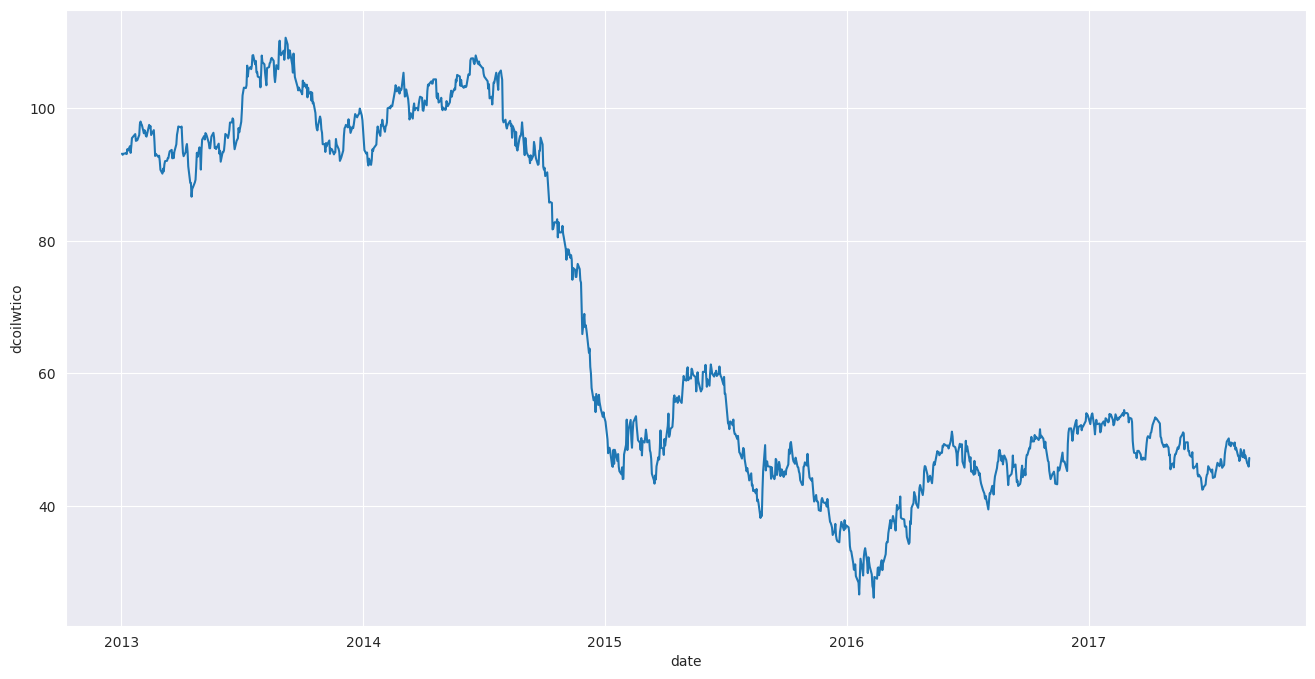

In [28]:
import seaborn as sns
sns.set_style('darkgrid')

_ = sns.lineplot(data = data_oil.dcoilwtico)

In [29]:
df_hev = pd.read_csv(path + 'holidays_events.csv', parse_dates=['date'], infer_datetime_format=True)

df_hev = df_hev.set_index('date').sort_index()

df_hev = df_hev[df_hev.locale == 'National'] 

df_hev = df_hev.groupby(df_hev.index).first() 

/tmp/ipykernel_33/3494477177.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_hev = pd.read_csv(path + 'holidays_events.csv', parse_dates=['date'], infer_datetime_format=True)


In [30]:
calendar['dofw'] = calendar.index.dayofweek
calendar['wd'] = True
calendar.loc[calendar.dofw > 4, 'wd'] = False

calendar = calendar.merge(df_hev, how='left', left_index=True, right_index=True)

calendar.loc[calendar.type == 'Bridge'  , 'wd'] = False
 
calendar.loc[calendar.type == 'Work Day', 'wd'] = True
 
calendar.loc[calendar.type == 'Transfer', 'wd'] = False
 
calendar.loc[(calendar.type == 'Holiday') & (calendar.transferred == False), 'wd'] = False
 
calendar.loc[(calendar.type == 'Holiday') & (calendar.transferred == True ), 'wd'] = True

calendar.drop(['locale', 'locale_name', 'description', 'transferred'], axis = 1, inplace = True) 

calendar

,dcoilwtico,dofw,wd,type
2013-01-01,93.14,1,False,Holiday
2013-01-02,93.14,2,True,NaN
2013-01-03,92.97,3,True,NaN
2013-01-04,93.12,4,True,NaN
2013-01-05,93.20,5,True,Work Day
...,...,...,...,...
2017-08-27,46.40,6,False,NaN
2017-08-28,46.40,0,True,NaN
2017-08-29,46.46,1,True,NaN
2017-08-30,45.96,2,True,NaN


In [31]:
calendar = pd.get_dummies(calendar, columns = ['dofw']) 

calendar = pd.get_dummies(calendar, columns = ['type']) 

calendar = calendar.to_period('D')

calendar

,dcoilwtico,wd,dofw_0,dofw_1,dofw_2,dofw_3,dofw_4,dofw_5,dofw_6,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day
2013-01-01,93.14,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2013-01-02,93.14,True,False,False,True,False,False,False,False,False,False,False,False,False,False
2013-01-03,92.97,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2013-01-04,93.12,True,False,False,False,False,True,False,False,False,False,False,False,False,False
2013-01-05,93.20,True,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-27,46.40,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2017-08-28,46.40,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2017-08-29,46.46,True,False,True,False,False,False,False,False,False,False,False,False,False,False
2017-08-30,45.96,True,False,False,True,False,False,False,False,False,False,False,False,False,False


In [32]:
df_train = pd.read_csv('/kaggle/input/fbdddg/train.csv',
                    parse_dates = ['date'], infer_datetime_format = True,
                    dtype = {'store_nbr' : 'category', 'family' : 'category'},
                    usecols = ['date', 'store_nbr', 'family', 'sales'])

df_train['day_of_week'] = df_train['date'].dt.day_name()
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

df_train['date'] = df_train.date.dt.to_period('D')

df_train = df_train.set_index(['date', 'store_nbr', 'family']).sort_index()
df_train

/tmp/ipykernel_33/3675771887.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_train = pd.read_csv('/kaggle/input/fbdddg/train.csv',


sales day_of_week  year  \
date       store_nbr family                                                   
2013-01-01 1         AUTOMOTIVE                     0.000     Tuesday  2013   
                     BABY CARE                      0.000     Tuesday  2013   
                     BEAUTY                         0.000     Tuesday  2013   
                     BEVERAGES                      0.000     Tuesday  2013   
                     BOOKS                          0.000     Tuesday  2013   
...                                                   ...         ...   ...   
2017-08-15 9         POULTRY                      438.133     Tuesday  2017   
                     PREPARED FOODS               154.553     Tuesday  2017   
                     PRODUCE                     2419.729     Tuesday  2017   
                     SCHOOL AND OFFICE SUPPLIES   121.000     Tuesday  2017   
                     SEAFOOD                       16.000     Tuesday  2017   

                                                 month  day  
date       store_nbr family                                  
2013-01-01 1         AUTOMOTIVE                      1    1  
                     BABY CARE                       1    1  
                     BEAUTY                          1    1  
                     BEVERAGES                       1    1  
                     BOOKS                           1    1  
...                                                ...  ...  
2017-08-15 9         POULTRY                         8   15  
                     PREPARED FOODS                  8   15  
                     PRODUCE                         8   15  
                     SCHOOL AND OFFICE SUPPLIES      8   15  
                     SEAFOOD                         8   15  

[3000888 rows x 5 columns]

In [33]:
import plotly.express as px
by_month_df = df_train.groupby(['month'])['sales'].mean().reset_index()
fig = px.bar(by_month_df, x='month', y='sales', color='sales', color_continuous_scale="sunset")
fig.show()

In [34]:
import plotly.graph_objs as go
by_day_df = df_train.groupby(['day'])['sales'].mean().reset_index()
fig = go.Figure(data=go.Scatter(x=by_day_df['day'], 
                                y=by_day_df['sales'],
                                marker_color='blue', text="sales"))
fig.show()

In [35]:
by_weekday_df = df_train.groupby(['day_of_week'])['sales'].mean()
new_order_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
by_weekday_df = by_weekday_df.reindex(new_order_week, axis=0).reset_index()
fig = px.bar(by_weekday_df, x='day_of_week', y='sales', color='sales', color_continuous_scale="sunset")
fig.show()

In [41]:
sdate = '2017-04-30' 
edate = '2017-08-15'

y = df_train.unstack(['store_nbr', 'family']).loc[sdate:edate]

In [43]:
fourier = CalendarFourier(freq = 'W', order = 4)

dp = DeterministicProcess(index = y.index,
                          order = 1,
                          seasonal = False,
                          constant = False,
                          additional_terms = [fourier],
                          drop = True)

X = dp.in_sample()

X = X.join(calendar)

X

,trend,"sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)",dcoilwtico,wd,dofw_0,...,dofw_3,dofw_4,dofw_5,dofw_6,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day
date,,,,,,,,,,,,,,,,,,,,,
2017-04-30,1.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,48.83,False,False,...,False,False,False,True,False,False,False,False,False,False
2017-05-01,2.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,48.83,False,True,...,False,False,False,False,False,False,False,True,False,False
2017-05-02,3.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,47.65,True,False,...,False,False,False,False,False,False,False,False,False,False
2017-05-03,4.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,47.79,True,False,...,False,False,False,False,False,False,False,False,False,False
2017-05-04,5.0,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,45.55,True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,104.0,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,48.81,False,False,...,False,True,False,False,False,False,False,False,True,False
2017-08-12,105.0,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,47.59,False,False,...,False,False,True,False,False,False,False,False,False,False
2017-08-13,106.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,47.59,False,False,...,False,False,False,True,False,False,False,False,False,False


In [44]:
numOfPredictedDays = 16

X_test = dp.out_of_sample(steps = numOfPredictedDays) 

X_test = X_test.join(calendar)

X_test

,trend,"sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)",dcoilwtico,wd,dofw_0,...,dofw_3,dofw_4,dofw_5,dofw_6,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day
2017-08-16,109.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,46.80,True,False,...,False,False,False,False,False,False,False,False,False,False
2017-08-17,110.0,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,47.07,True,False,...,True,False,False,False,False,False,False,False,False,False
2017-08-18,111.0,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,48.59,True,False,...,False,True,False,False,False,False,False,False,False,False
2017-08-19,112.0,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,47.39,False,False,...,False,False,True,False,False,False,False,False,False,False
2017-08-20,113.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,47.39,False,False,...,False,False,False,True,False,False,False,False,False,False
2017-08-21,114.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,47.39,True,True,...,False,False,False,False,False,False,False,False,False,False
2017-08-22,115.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,47.65,True,False,...,False,False,False,False,False,False,False,False,False,False
2017-08-23,116.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,48.45,True,False,...,False,False,False,False,False,False,False,False,False,False
2017-08-24,117.0,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,47.24,True,False,...,True,False,False,False,False,False,False,False,False,False
2017-08-25,118.0,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,47.65,True,False,...,False,True,False,False,False,False,False,False,False,False


In [46]:
model = Ridge(fit_intercept=True, solver='auto', alpha=0.4)
model.fit(X, y)

y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)

In [47]:
y_pred   = y_pred.stack(['store_nbr', 'family']).reset_index()
y_target = y.stack(['store_nbr', 'family']).reset_index().copy()

y_target['sales_pred'] = y_pred['sales'].clip(0.)

pred1 = y_target.groupby('family').apply(lambda r: mean_squared_log_error(r['sales'], r['sales_pred']))

display(y_target)
display(pred1)

/tmp/ipykernel_33/2106527510.py:1: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.

/tmp/ipykernel_33/2106527510.py:2: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.

/tmp/ipykernel_33/2106527510.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_33/2106527510.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated,

,date,store_nbr,family,sales,sales_pred
0,2017-04-30,1,AUTOMOTIVE,3.000,1.699386
1,2017-04-30,1,BABY CARE,0.000,0.000000
2,2017-04-30,1,BEAUTY,0.000,1.176623
3,2017-04-30,1,BEVERAGES,995.000,1112.188295
4,2017-04-30,1,BOOKS,1.000,0.453397
...,...,...,...,...,...
192451,2017-08-15,9,POULTRY,438.133,353.525575
192452,2017-08-15,9,PREPARED FOODS,154.553,97.960963
192453,2017-08-15,9,PRODUCE,2419.729,2260.146368
192454,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,91.933777


family
AUTOMOTIVE                    0.234049
BABY CARE                     0.066874
BEAUTY                        0.239383
BEVERAGES                     0.030268
BOOKS                         0.016669
BREAD/BAKERY                  0.019131
CELEBRATION                   0.267111
CLEANING                      0.077920
DAIRY                         0.015947
DELI                          0.025111
EGGS                          0.077845
FROZEN FOODS                  0.062092
GROCERY I                     0.024422
GROCERY II                    0.298825
HARDWARE                      0.253732
HOME AND KITCHEN I            0.208552
HOME AND KITCHEN II           0.181352
HOME APPLIANCES               0.139725
HOME CARE                     0.040894
LADIESWEAR                    0.209289
LAWN AND GARDEN               0.176271
LINGERIE                      0.363970
LIQUOR,WINE,BEER              0.289849
MAGAZINES                     0.224529
MEATS                         0.028539
PERSONAL CARE     

In [48]:
sales_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)
sales_pred = sales_pred.stack(['store_nbr', 'family'])

sales_pred[sales_pred < 0] = 0. 

display(sales_pred)

/tmp/ipykernel_33/989579292.py:2: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.



sales
           store_nbr family                                 
2017-08-16 1         AUTOMOTIVE                     4.624512
                     BABY CARE                      0.000000
                     BEAUTY                         4.832948
                     BEVERAGES                   2387.317643
                     BOOKS                          0.246619
...                                                      ...
2017-08-31 9         POULTRY                      308.163537
                     PREPARED FOODS                84.509225
                     PRODUCE                     1146.576481
                     SCHOOL AND OFFICE SUPPLIES    99.157359
                     SEAFOOD                       10.374649

[28512 rows x 1 columns]

In [49]:
df_sub = pd.read_csv(path + 'sample_submission.csv', index_col='id')
df_sub.sales = sales_pred.values
df_sub.to_csv('submission.csv', index=True)

In [ ]:
from catboost import CatBoostRegressor

regressor = CatBoostRegressor(iterations=200, depth=4, learning_rate=0.01)
regressor.fit(X_train, y_train, verbose=False)

predictions = regressor.predict(X_test)
print(predictions)